In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from tensorflow import keras
from keras.layers import Dense

figsize = (20, 4.5)

# Exercise: QSAR Toxicity

## Context

**We will try learning an NN for the [QSAR oral toxicy dataset](https://archive.ics.uci.edu/ml/datasets/QSAR+oral+toxicity)**

The problem consists in determining whether a chemical compound is toxic

* The input is a set of binary attribute, each corresponding to a molacular fingerprint
* The output is the compound toxicity class

## Loading the Data

**We can load the data as usual**

Since all features are binary, there is no need to standardize

In [2]:
fname = os.path.join('data', 'QSAR Toxicity', 'qsar_oral_toxicity.csv')
in_cols = [f'f{i}' for i in range(1024)]
out_col = 'toxic'
data = pd.read_csv(fname, sep=';', header=None, names=in_cols + [out_col])
data[out_col] = data[out_col].astype('category').cat.codes

X = data[in_cols]
y = data[[out_col]]
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.34, random_state=42)

display(data)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,toxic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Assignment

**Try learning and evaluating a shallow NN classifier**

First, you need to build the model (use the variable name `nn` for the network):

Then, you need to perform training:

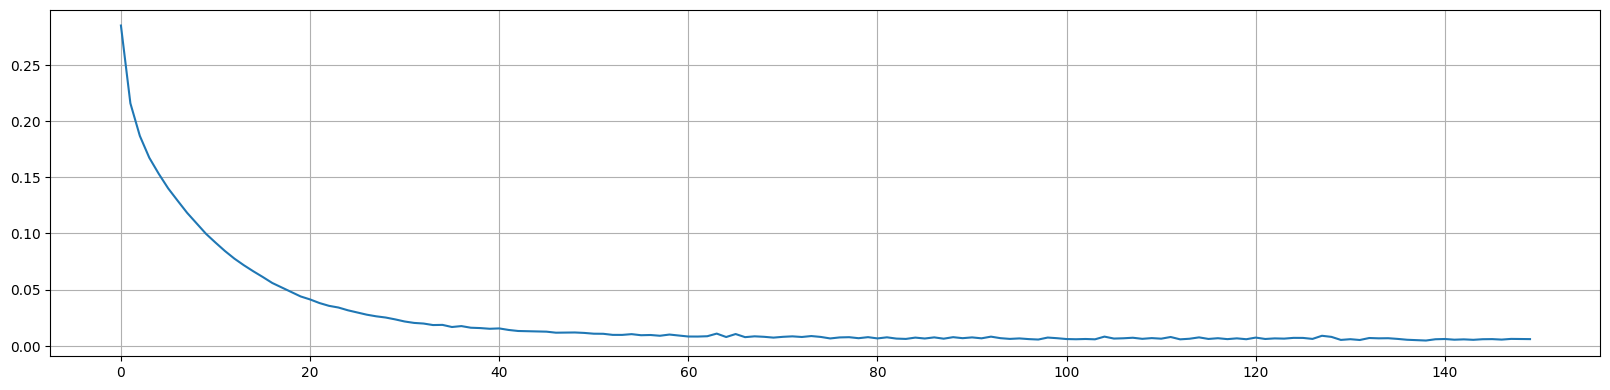

In [4]:
nn.compile(optimizer='adam', loss='binary_crossentropy')
history = nn.fit(X_tr, y_tr, batch_size=32, epochs=150, verbose=0)
loss_history = pd.Series(name='loss', data=history.history['loss'])
loss_history.plot(figsize=figsize, grid=':');

Once the model is trained, you can obtain the predictions

In [5]:
y_pred_tr_p = nn.predict(X_tr, verbose=0)
y_pred_ts_p = nn.predict(X_ts, verbose=0)
y_pred_tr = np.round(y_pred_tr_p)
y_pred_ts = np.round(y_pred_ts_p)

Finally, you can evaluate the model by displaying its accuracy and confusion matrix on both the training and the test data

Accuracy: 0.998 (training), 0.928 (test)


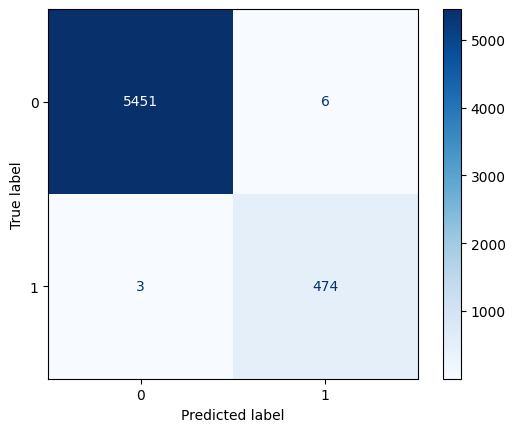

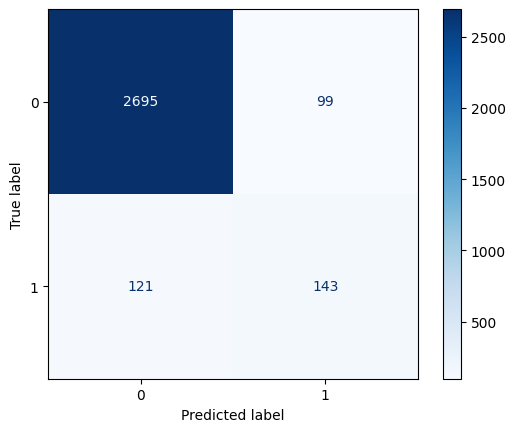

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

print(f'Accuracy: {accuracy_score(y_tr, y_pred_tr):.3f} (training), {accuracy_score(y_ts, y_pred_ts):.3f} (test)')

ConfusionMatrixDisplay.from_predictions(y_tr, y_pred_tr, cmap='Blues');

ConfusionMatrixDisplay.from_predictions(y_ts, y_pred_ts, cmap='Blues');